<h2>Impotando dependências</h2>

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn import svm
import numpy as np
from sklearn.decomposition import TruncatedSVD

<h2>Função de scores</h2>

In [3]:
def scores(y_test,prediction):
#     print("Accuracy: " + str(accuracy_score(y_test, prediction) * 100) + "%")
#     print("Precision: " + str(precision_score(y_test, prediction) * 100) + "%")
#     print("F1 score: " + str(f1_score(y_test, prediction) * 100) + "%")
#     print("Recall: " + str(recall_score(y_test, prediction) * 100) + "%")
    scores = []
    scores.append(accuracy_score(y_test, prediction) * 100)
    scores.append(precision_score(y_test, prediction) * 100)
    scores.append(f1_score(y_test, prediction) * 100)
    scores.append(recall_score(y_test, prediction) * 100) 
    print('Accuracy:',accuracy_score(y_test, prediction) * 100,'%')
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test, prediction, target_names=["red wine","white wine"]))
    return scores

<h2>Carregando dataset</h2>

In [4]:
#carregando dataset de vinhos brancos e vermelhos
wines = pd.read_csv('wines.csv',sep=",")
#separando dados e saidas
X = wines.iloc[:,0:12]
Y = wines.iloc[:,-1]

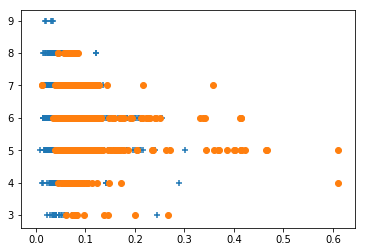

In [6]:
#Plotando vinhos
plt.scatter(wines[wines["type"]==1]["chlorides"],wines[wines["type"]==1]["quality"],marker="+")
plt.scatter(wines[wines["type"]==0]["chlorides"],wines[wines["type"]==0]["quality"],marker="o")
plt.show()

In [7]:
clf = svm.SVC(kernel='linear', C = 1.0)

<h2>Normalizando dados</h2>

<h3>Pela norma l1</h3>

In [6]:
normalizer = Normalizer(norm='l1')
winesl1 = X.copy()
winesl1.iloc[0:,0:12] = normalizer.transform(X)
winesl1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.030496,0.000659,0.001236,0.056459,0.000231,0.135996,0.692343,0.004114,0.011951,0.001813,0.035853,0.028848
1,0.037031,0.002051,0.001766,0.077195,0.000302,0.113942,0.643770,0.005671,0.018231,0.003190,0.062668,0.034182
2,0.086411,0.003227,0.004060,0.024986,0.000812,0.176987,0.447672,0.010353,0.034460,0.008016,0.130137,0.072877
3,0.036697,0.003556,0.002356,0.009061,0.000553,0.167630,0.693174,0.004517,0.014543,0.003126,0.042134,0.022653
4,0.042753,0.001579,0.002499,0.006577,0.000178,0.203899,0.591964,0.006507,0.021311,0.002368,0.080902,0.039464


<h3>Kfold</h3>

In [8]:
def cross_validation(dados,folds=10):
    scor = []
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(dados):
        X_train, X_test = dados.iloc[train_index], dados.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        model = clf.fit(X_train,y_train)
        prediction = model.predict(X_test)
        scor.append(scores(y_test,prediction))
    return scor

In [9]:
scorl1 = cross_validation(winesl1)

Accuracy: 91.6923076923077 %
[[114  46]
 [  8 482]]
              precision    recall  f1-score   support

    red wine       0.93      0.71      0.81       160
  white wine       0.91      0.98      0.95       490

   micro avg       0.92      0.92      0.92       650
   macro avg       0.92      0.85      0.88       650
weighted avg       0.92      0.92      0.91       650

Accuracy: 94.3076923076923 %
[[122  32]
 [  5 491]]
              precision    recall  f1-score   support

    red wine       0.96      0.79      0.87       154
  white wine       0.94      0.99      0.96       496

   micro avg       0.94      0.94      0.94       650
   macro avg       0.95      0.89      0.92       650
weighted avg       0.94      0.94      0.94       650

Accuracy: 93.07692307692308 %
[[129  40]
 [  5 476]]
              precision    recall  f1-score   support

    red wine       0.96      0.76      0.85       169
  white wine       0.92      0.99      0.95       481

   micro avg       0.93  

<h3>Pela norma l2</h3>

In [10]:
normalizer = Normalizer(norm='l2')
winesl2 = X.copy()
winesl2.iloc[0:,0:12] = normalizer.transform(X)
winesl2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.042946,0.000929,0.001741,0.079509,0.000325,0.191518,0.975001,0.005793,0.016830,0.002554,0.050491,0.040625
1,0.055812,0.003091,0.002662,0.116346,0.000455,0.171728,0.970265,0.008547,0.027477,0.004808,0.094451,0.051519
2,0.168350,0.006288,0.007910,0.048680,0.001582,0.344813,0.872175,0.020170,0.067137,0.015618,0.253539,0.141982
3,0.051258,0.004968,0.003291,0.012656,0.000772,0.234141,0.968204,0.006309,0.020313,0.004366,0.058852,0.031641
4,0.067390,0.002488,0.003940,0.010368,0.000280,0.321397,0.933089,0.010256,0.033591,0.003732,0.127522,0.062206


In [11]:
scorl2 = cross_validation(winesl2)

Accuracy: 92.0 %
[[116  44]
 [  8 482]]
              precision    recall  f1-score   support

    red wine       0.94      0.72      0.82       160
  white wine       0.92      0.98      0.95       490

   micro avg       0.92      0.92      0.92       650
   macro avg       0.93      0.85      0.88       650
weighted avg       0.92      0.92      0.92       650

Accuracy: 94.0 %
[[120  34]
 [  5 491]]
              precision    recall  f1-score   support

    red wine       0.96      0.78      0.86       154
  white wine       0.94      0.99      0.96       496

   micro avg       0.94      0.94      0.94       650
   macro avg       0.95      0.88      0.91       650
weighted avg       0.94      0.94      0.94       650

Accuracy: 93.07692307692308 %
[[130  39]
 [  6 475]]
              precision    recall  f1-score   support

    red wine       0.96      0.77      0.85       169
  white wine       0.92      0.99      0.95       481

   micro avg       0.93      0.93      0.93      

<h3>Pela norma max</h3>

In [12]:
normalizer = Normalizer(norm='max')
winesmax = X.copy()
winesmax.iloc[0:,0:12] = normalizer.transform(X)
winesmax.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.044048,0.000952,0.001786,0.081548,0.000333,0.196429,1.0,0.005942,0.017262,0.002619,0.051786,0.041667
1,0.057522,0.003186,0.002743,0.119912,0.000469,0.176991,1.0,0.008809,0.028319,0.004956,0.097345,0.053097
2,0.193023,0.007209,0.009070,0.055814,0.001814,0.395349,1.0,0.023127,0.076977,0.017907,0.290698,0.162791
3,0.052941,0.005131,0.003399,0.013072,0.000797,0.241830,1.0,0.006516,0.020980,0.004510,0.060784,0.032680
4,0.072222,0.002667,0.004222,0.011111,0.000300,0.344444,1.0,0.010992,0.036000,0.004000,0.136667,0.066667


In [13]:
scormax = cross_validation(winesmax)

Accuracy: 92.0 %
[[116  44]
 [  8 482]]
              precision    recall  f1-score   support

    red wine       0.94      0.72      0.82       160
  white wine       0.92      0.98      0.95       490

   micro avg       0.92      0.92      0.92       650
   macro avg       0.93      0.85      0.88       650
weighted avg       0.92      0.92      0.92       650

Accuracy: 94.0 %
[[120  34]
 [  5 491]]
              precision    recall  f1-score   support

    red wine       0.96      0.78      0.86       154
  white wine       0.94      0.99      0.96       496

   micro avg       0.94      0.94      0.94       650
   macro avg       0.95      0.88      0.91       650
weighted avg       0.94      0.94      0.94       650

Accuracy: 93.23076923076923 %
[[131  38]
 [  6 475]]
              precision    recall  f1-score   support

    red wine       0.96      0.78      0.86       169
  white wine       0.93      0.99      0.96       481

   micro avg       0.93      0.93      0.93      

<h3>Por MinMaxScaler</h3>

In [14]:
scaller = MinMaxScaler(feature_range=(0, 12))
winesminmax = X.copy()
winesminmax.iloc[0:,0:12] = scaller.fit_transform(X)
winesminmax.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3.570248,0.64,2.168675,2.411043,0.936877,1.333333,4.479263,2.577212,1.674419,1.483146,1.217391,8.0
1,2.677686,2.24,2.240964,2.383436,0.877076,0.791667,2.958525,1.927126,4.465116,2.292135,5.217391,6.0
2,4.462810,1.84,2.819277,0.331288,1.375415,0.666667,1.023041,1.695778,5.488372,3.707865,7.826087,8.0
3,4.264463,5.64,3.759036,0.257669,2.252492,1.500000,4.064516,2.264893,4.558140,3.168539,2.260870,4.0
4,2.677686,1.28,2.746988,0.073620,0.358804,1.250000,2.322581,0.497397,4.837209,0.943820,7.478261,6.0


In [15]:
scorminmax = cross_validation(winesminmax)

Accuracy: 99.53846153846155 %
[[157   3]
 [  0 490]]
              precision    recall  f1-score   support

    red wine       1.00      0.98      0.99       160
  white wine       0.99      1.00      1.00       490

   micro avg       1.00      1.00      1.00       650
   macro avg       1.00      0.99      0.99       650
weighted avg       1.00      1.00      1.00       650

Accuracy: 99.6923076923077 %
[[154   0]
 [  2 494]]
              precision    recall  f1-score   support

    red wine       0.99      1.00      0.99       154
  white wine       1.00      1.00      1.00       496

   micro avg       1.00      1.00      1.00       650
   macro avg       0.99      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

Accuracy: 99.53846153846155 %
[[167   2]
 [  1 480]]
              precision    recall  f1-score   support

    red wine       0.99      0.99      0.99       169
  white wine       1.00      1.00      1.00       481

   micro avg       1.00 

In [16]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.160,0.30,13.70,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7,1
1,6.5,0.360,0.31,13.55,0.053,20.0,113.0,0.99544,3.20,0.56,11.0,6,1
2,8.3,0.310,0.39,2.40,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7,0
3,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5,0
4,6.5,0.240,0.38,1.00,0.027,31.0,90.0,0.98926,3.24,0.36,12.3,6,1


In [16]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(X)

# Show feature
winesS = X.copy()
winesS.iloc[0:,0:12] = standardized
winesS.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,-1.091373,-0.128234,1.735549,-0.000967,0.139434,0.924588,1.185071,-1.981037,-0.613385,-1.502407,1.353228
1,-0.551792,0.123518,-0.059414,1.704019,-0.086605,-0.593041,-0.048561,0.247917,-0.115073,0.193097,0.426120,0.207999
2,0.836739,-0.180205,0.491146,-0.639680,0.627050,-0.762074,-1.287116,-0.085589,0.569114,1.604440,1.683855,1.353228
3,0.682458,2.705162,1.385805,-0.723758,1.883084,0.364811,0.659184,0.734837,-0.052874,1.066785,-0.999313,-0.937230
4,-0.551792,-0.605417,0.422326,-0.933956,-0.828807,0.026746,-0.455515,-1.813153,0.133722,-1.151040,1.516157,0.207999


In [17]:
scorss = cross_validation(winesS)

Accuracy: 99.53846153846155 %
[[157   3]
 [  0 490]]
              precision    recall  f1-score   support

    red wine       1.00      0.98      0.99       160
  white wine       0.99      1.00      1.00       490

   micro avg       1.00      1.00      1.00       650
   macro avg       1.00      0.99      0.99       650
weighted avg       1.00      1.00      1.00       650

Accuracy: 99.6923076923077 %
[[154   0]
 [  2 494]]
              precision    recall  f1-score   support

    red wine       0.99      1.00      0.99       154
  white wine       1.00      1.00      1.00       496

   micro avg       1.00      1.00      1.00       650
   macro avg       0.99      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

Accuracy: 99.53846153846155 %
[[167   2]
 [  1 480]]
              precision    recall  f1-score   support

    red wine       0.99      0.99      0.99       169
  white wine       1.00      1.00      1.00       481

   micro avg       1.00 

In [24]:
def plot_graph(scor, pp):
    measures = ["accuracy","precision","f1-score","recall"]
    data = {s:{'Run '+str(i):scor[i][k] for i in range(10)}for k,s in enumerate(measures)}
    df = pd.DataFrame(data)

    df.plot(kind='barh',figsize=(20,20))

    for i in range(91,101):
        plt.axvline(x=i, color='k', linestyle='--')

    plt.xlim(90,101)
    plt.title('SVM linear x '+pp)
    plt.savefig('images_graphs/'+pp+'svm.png')
    plt.show()
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

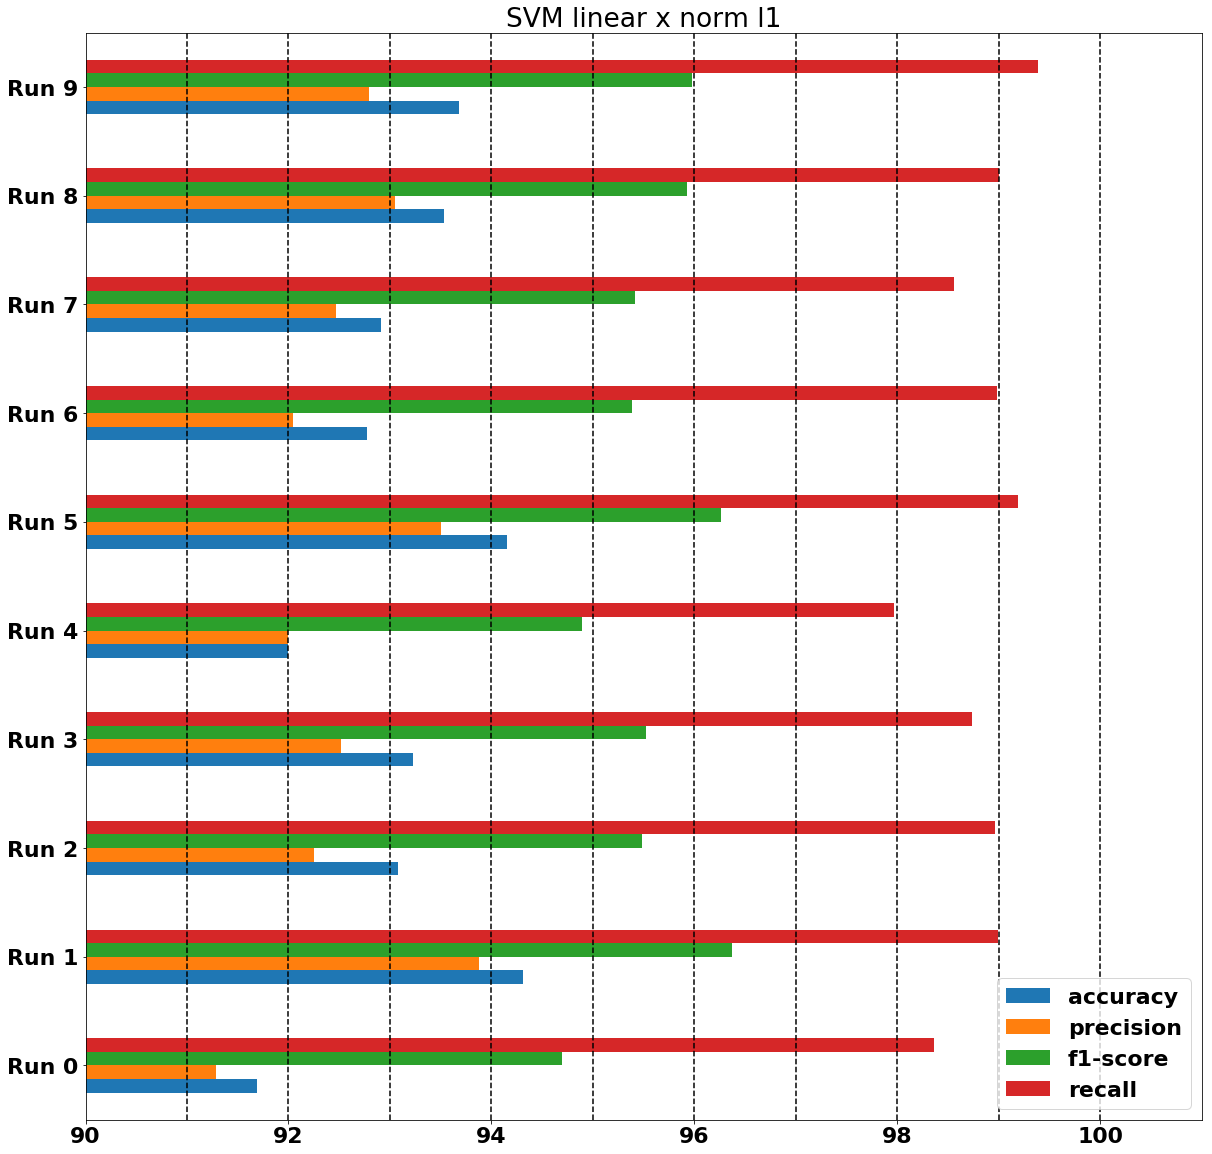

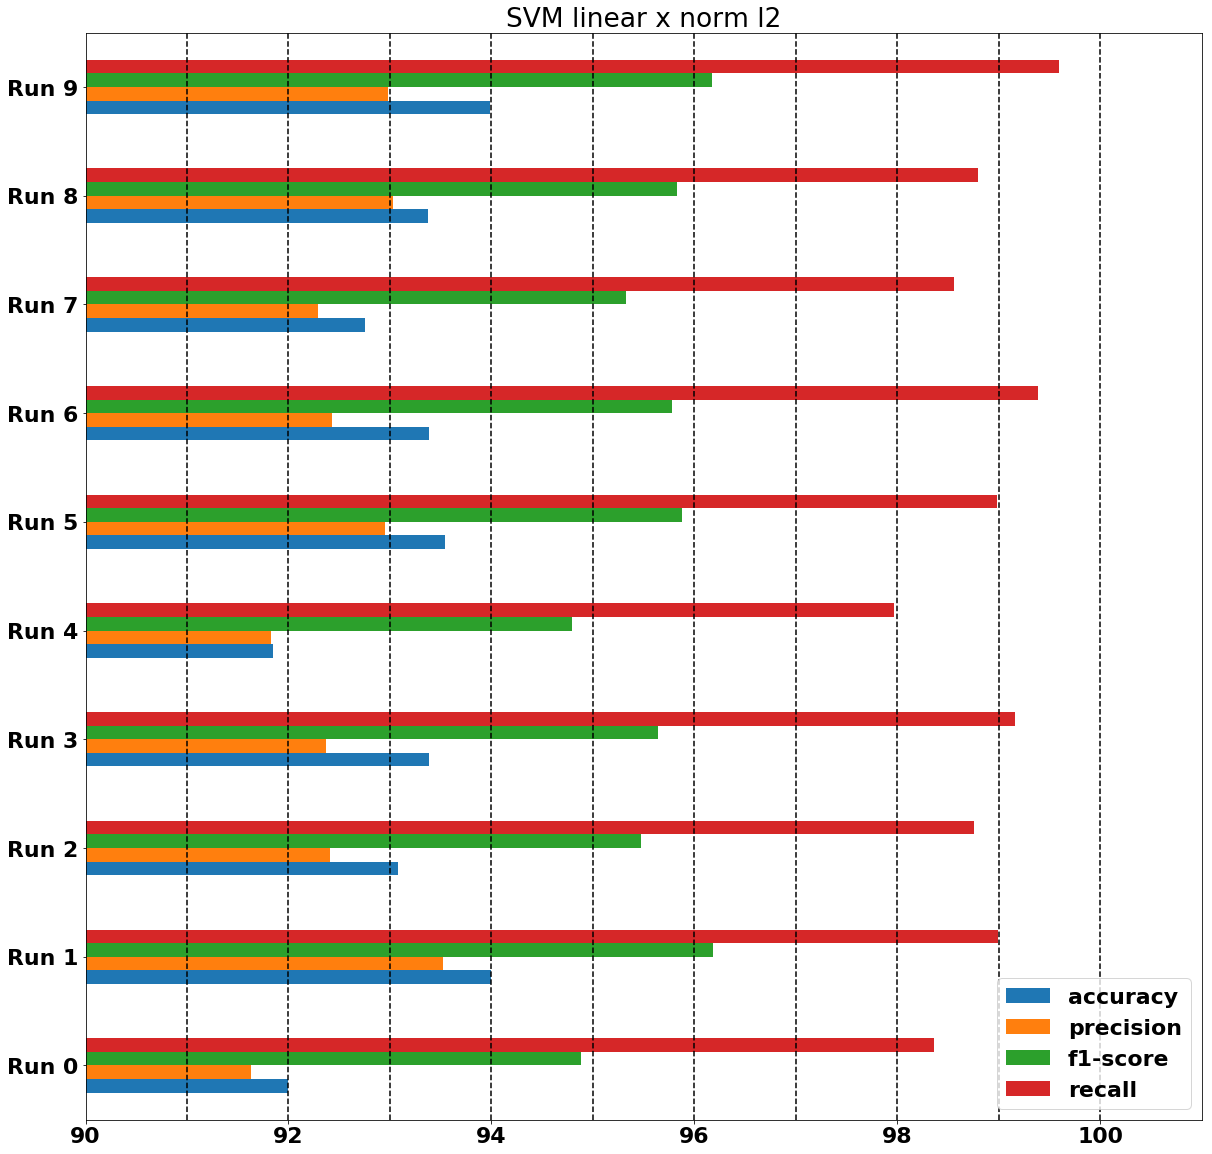

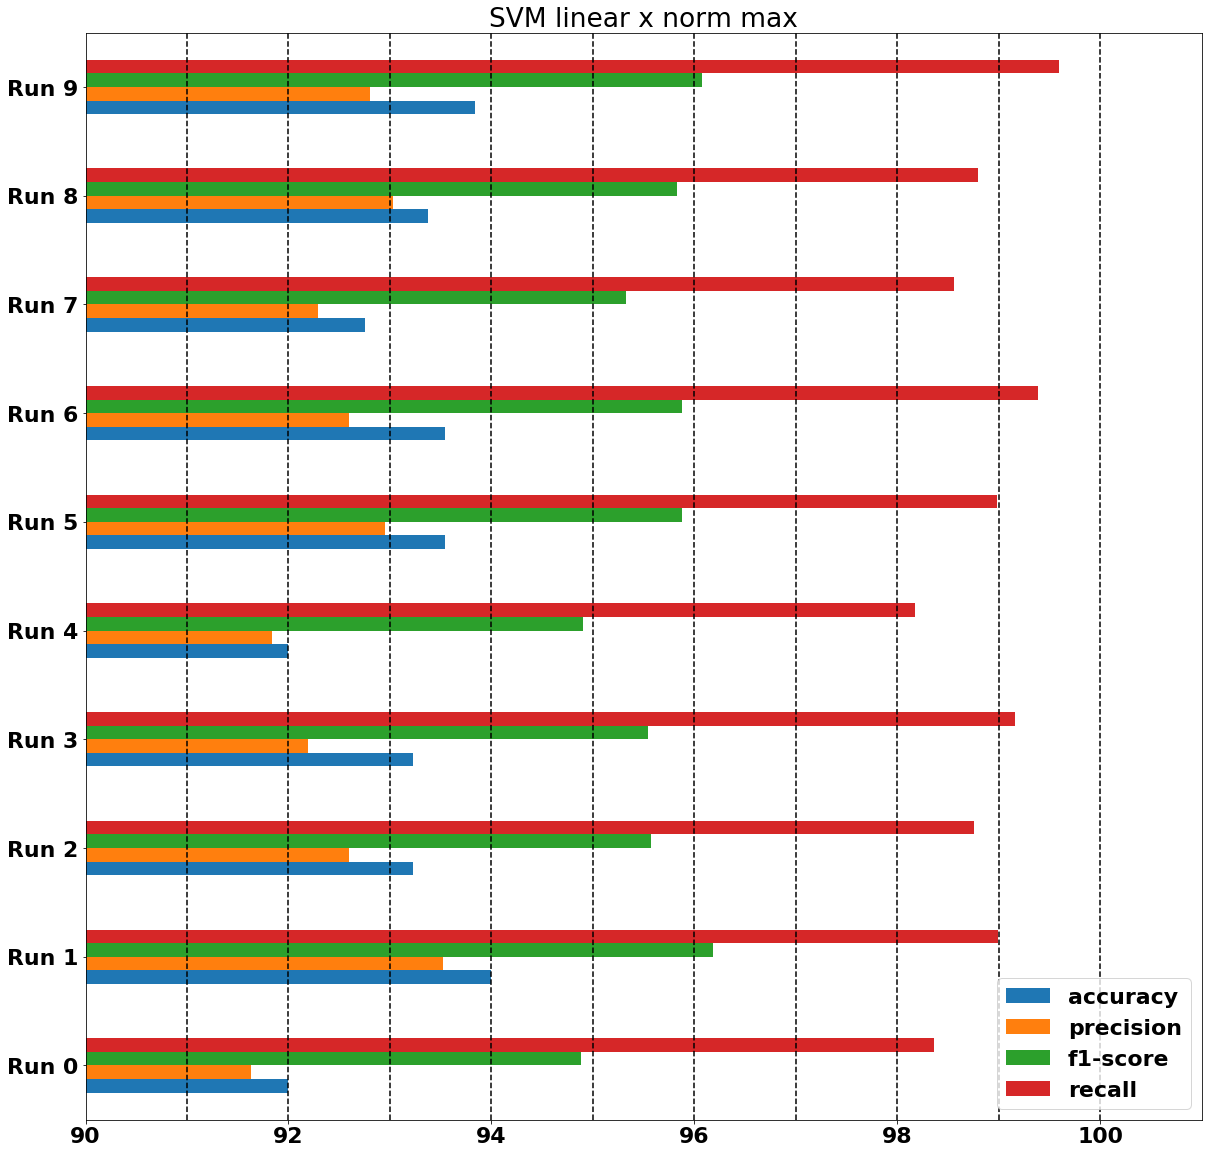

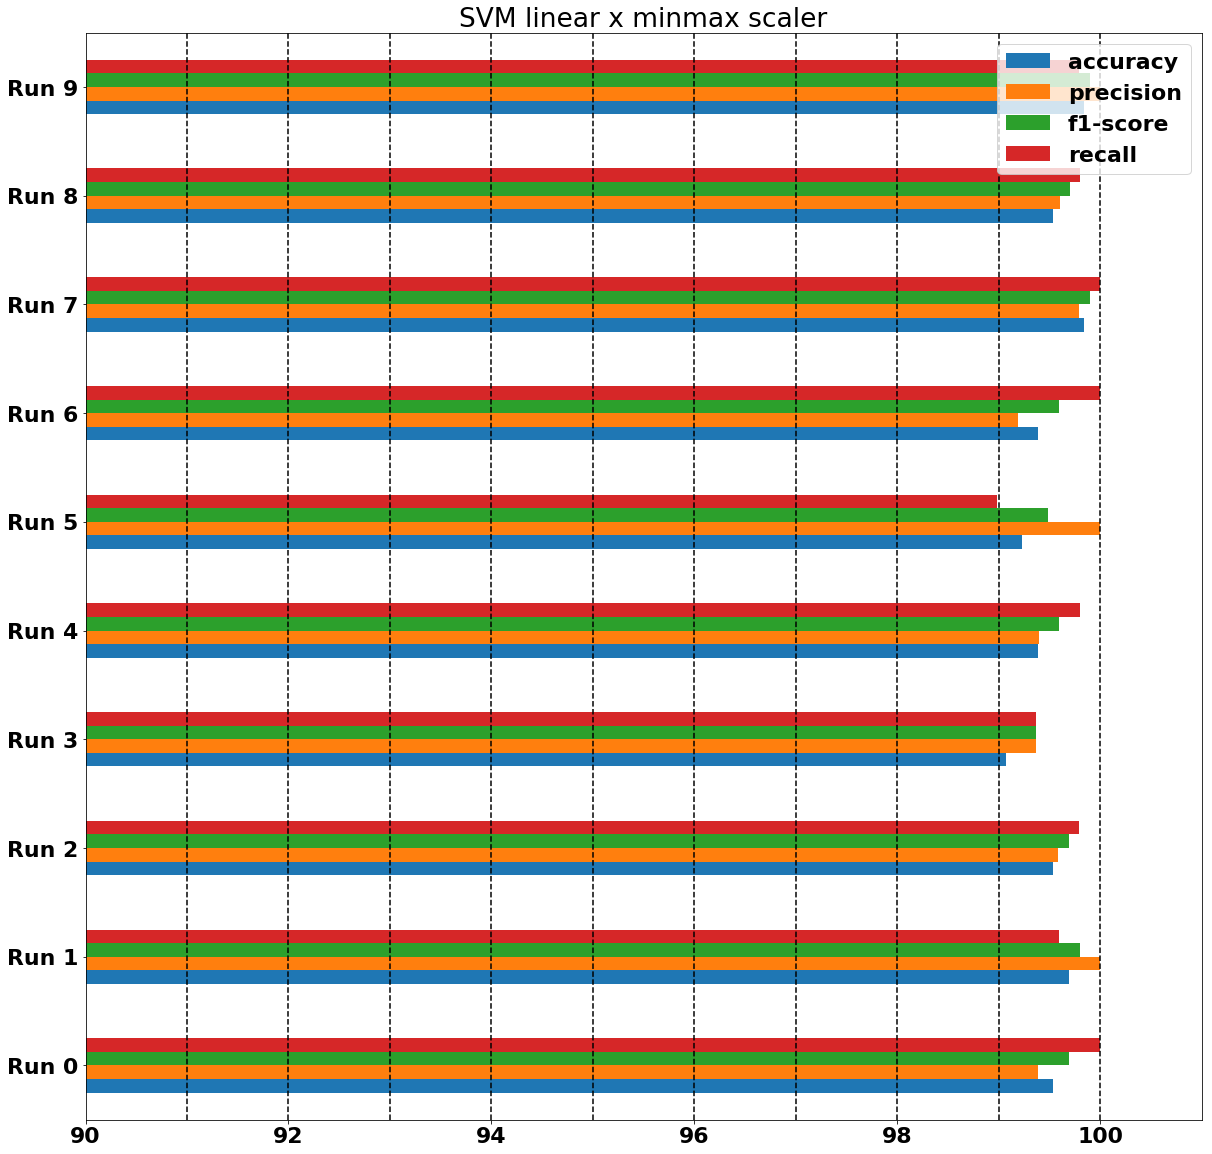

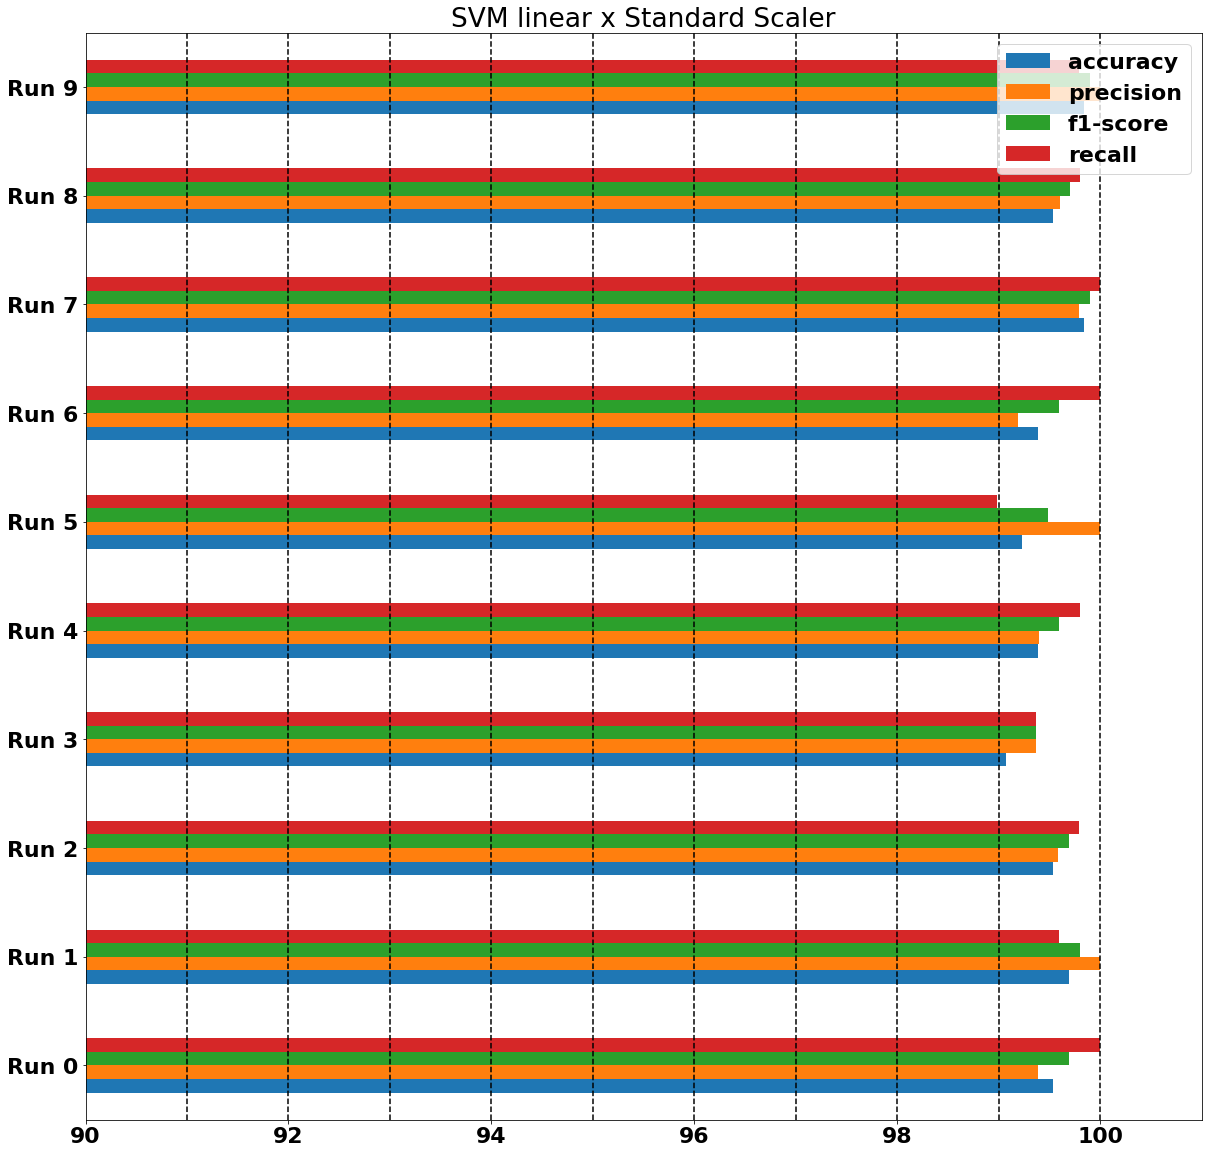

In [25]:
pps = ['norm l1','norm l2','norm max','minmax scaler','Standard Scaler']
scs = [scorl1,scorl2,scormax,scorminmax,scorss]
for pp,sc in zip(pps,scs):
    plot_graph(sc,pp)

In [26]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')